In [1]:
!pip install -U node2vec

  Created wheel for node2vec: filename=node2vec-0.4.3-cp37-none-any.whl size=5982 sha256=dd07522b47dfc4547a49aab7c7d4c3b0a2568a3c3948d8afc0ab49176e15da91
  Stored in directory: /root/.cache/pip/wheels/34/f4/60/55708b5e797260310451d919c8f898bbd4acd1901367001f20
Successfully built node2vec


In [106]:
import pandas as pd
import networkx as nx
from node2vec import Node2Vec
from matplotlib import pyplot as plt, rc, cm
from matplotlib.pyplot import figure
import matplotlib.animation as animation
import seaborn as sns
from sklearn.manifold import TSNE

In [49]:
edge = pd.read_csv("https://raw.githubusercontent.com/jinhangjiang/Datasets/main/Network%20Data/emailEUcore/email-Eu-core.txt",delimiter = " ",names=["Source","Target"])
edge["weight"] = 1 * len(edge)
label = pd.read_csv("https://raw.githubusercontent.com/jinhangjiang/Datasets/main/Network%20Data/emailEUcore/email-Eu-core-department-labels.txt",delimiter = " ",names=["Vertex","Label"])
label.Vertex = label.Vertex.astype(str)

In [16]:
def convert_graph(edgelist,name):
  graph=nx.Graph()
  graph.add_weighted_edges_from([tuple(x) for x in edgelist.values])
  graph.name = "Covid DisNet for" + " " + name
  print(nx.info(graph))
  print("------------------------------------")
  print("************************************")
  print("------------------------------------")
  return graph

In [20]:
graph = convert_graph(edge, "eu email")

Name: Covid DisNet for eu email
Type: Graph
Number of nodes: 1005
Number of edges: 16706
Average degree:  33.2458
------------------------------------
************************************
------------------------------------


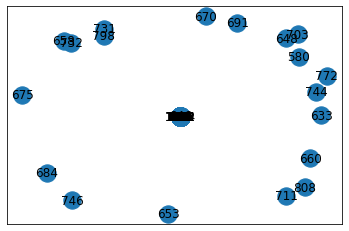

In [32]:
nx.draw_networkx(graph)

In [18]:
vector_size = round(edge.shape[0]**0.25)
vector_size

13

In [21]:
%%time
setup = Node2Vec(graph,dimensions=vector_size, walk_length=5, num_walks=5)
model = setup.fit(window=10, min_count=1)
print("--------------------------------------")

Generating walks (CPU: 1):   0%|          | 0/5 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 5/5 [00:01<00:00,  4.60it/s]


--------------------------------------
CPU times: user 14.9 s, sys: 151 ms, total: 15.1 s
Wall time: 15.2 s


In [118]:
def ThreeDplot(model):
    from mpl_toolkits.mplot3d import Axes3D
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)

    lab = []
    for i in labels:
      lab.append(label[label.Vertex==i].values[0][1])
    
    tsne_model = TSNE(perplexity=10, n_components=3, learning_rate=20, init='random', n_iter=1000, random_state=42)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    z = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        z.append(value[2])
    
    sns.set_style("whitegrid", {'axes.grid' : False})

    fig = plt.figure(figsize=(20, 15))

    ax = Axes3D(fig) 

    gist_ncar = cm.get_cmap('gist_ncar', len(set(lab)))


    ax.scatter(x, y, z, c=lab, cmap=gist_ncar, marker='o',alpha=0.7,s=200)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')


    for x_label, y_label, z_label, label_node in zip(x, y, z, lab):
      ax.text(x_label, y_label, z_label, label_node)

    ## 360 degree view
    def rotate(angle):
      ax.view_init(azim=angle)

    
    rc('animation', html='jshtml')
    rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)
    rot_animation.save('rotation.gif', dpi=40, writer='pillow') 
    rot_animation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


CPU times: user 4min 53s, sys: 17 s, total: 5min 10s
Wall time: 4min 47s


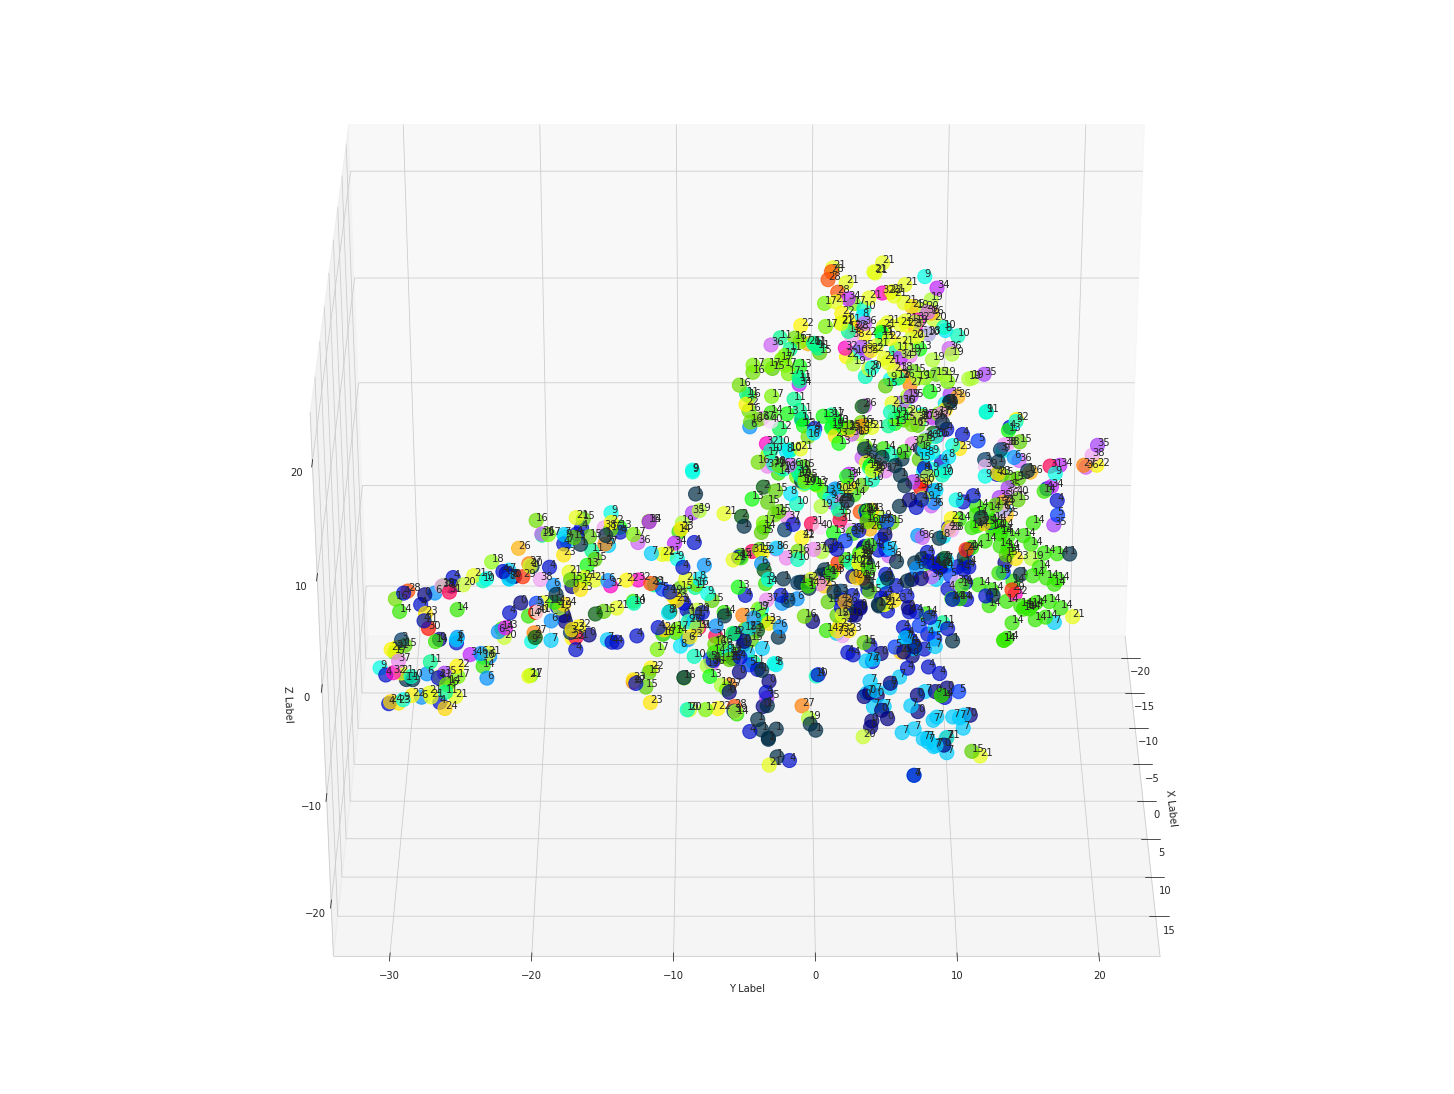

In [119]:
%%time
ThreeDplot(model)